In [5]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
titanic = pd.read_csv('../day2/titanic_clean.csv')
temp    = pd.read_csv('../day2/global_temp_clean.csv')
retail  = pd.read_csv('../day2/online_retail_clean.csv')
sns.set_theme(style='whitegrid')

In [6]:
for name, df in zip(['Titanic','Temp','Retail'],[titanic,temp,retail]):
    print(f'{name}: {df.shape} | Missing: {df.isna().sum().sum()}')

Titanic: (889, 12) | Missing: 0
Temp: (1992, 9) | Missing: 0
Retail: (397924, 9) | Missing: 0


单变量分布，观察偏态

<Axes: xlabel='fare', ylabel='Count'>

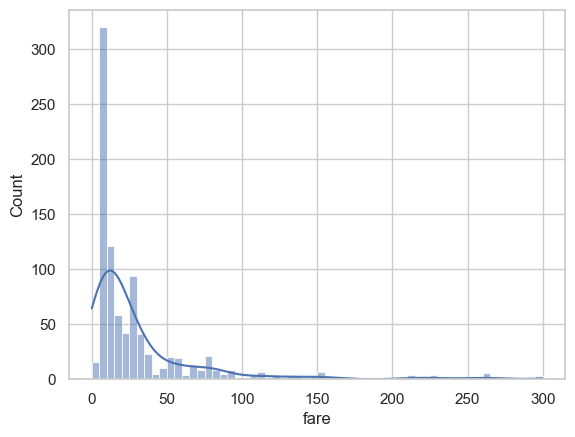

In [8]:
sns.histplot(titanic['fare'], kde=True)

kde=True 告诉 seaborn 在直方图（histplot）上再叠加一条核密度估计曲线（Kernel Density Estimate）。

双变量关系

<Axes: xlabel='dt', ylabel='LandAverageTemperature'>

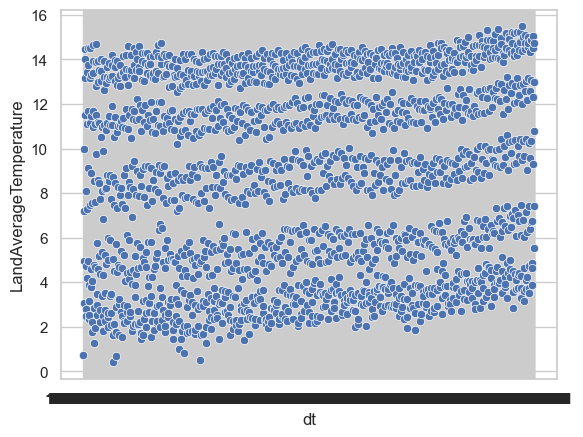

In [9]:
sns.scatterplot(data=temp,x='dt',y='LandAverageTemperature')

分组对比, 舱位-生还

<Axes: xlabel='pclass', ylabel='survived'>

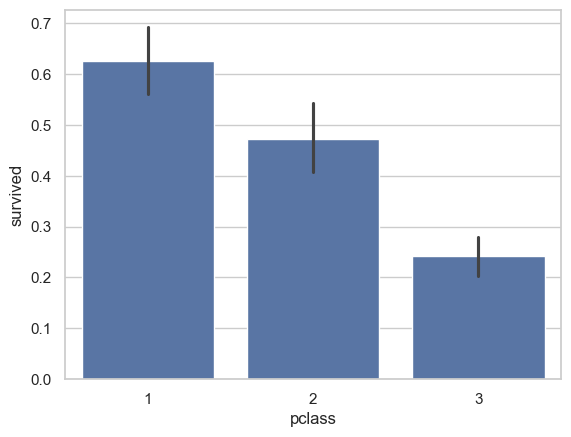

In [11]:
sns.barplot(data=titanic,x='pclass',y='survived')

相关性， 零售指标

<Axes: >

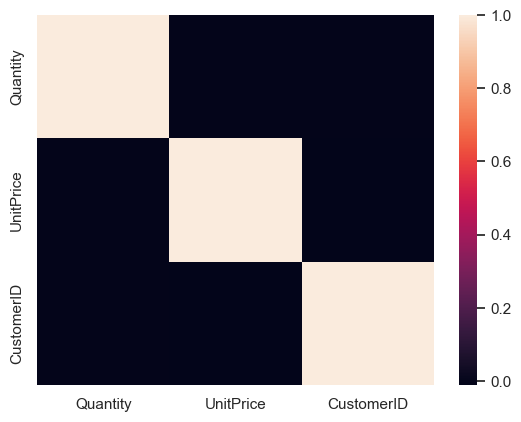

In [12]:
sns.heatmap(retail[['Quantity','UnitPrice','CustomerID']].corr())

异常检测，价格离群

<Axes: ylabel='UnitPrice'>

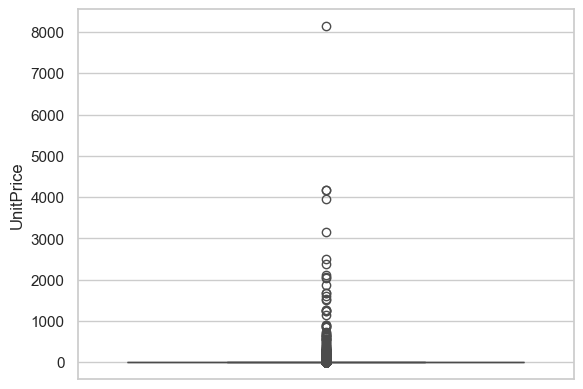

In [13]:
sns.boxplot(data=retail,y='UnitPrice')

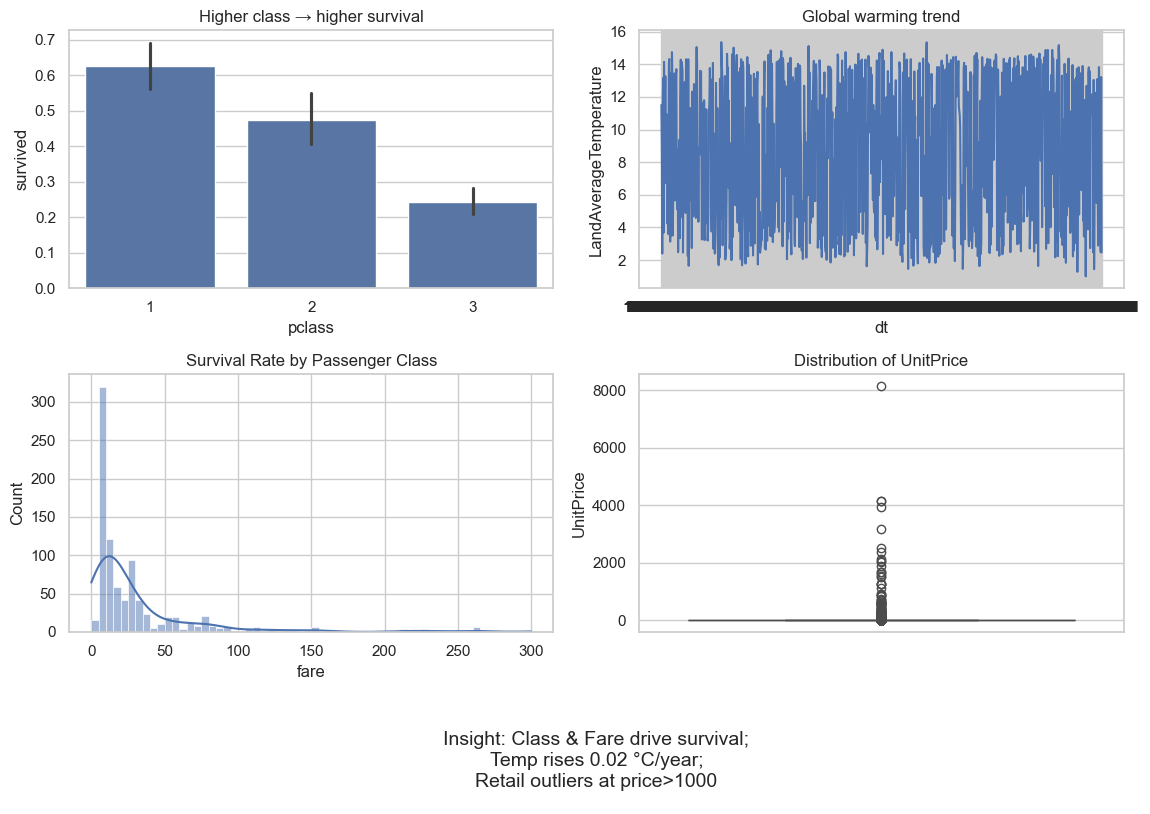

In [ ]:
fig = plt.figure(figsize=(11.7, 8.3))
gs  = fig.add_gridspec(3, 2, height_ratios=[3,3,1])

ax0 = fig.add_subplot(gs[0,0])
sns.barplot(data=titanic, x='pclass', y='survived', ax=ax0)
ax0.set_title('Higher class → higher survival')

ax1 = fig.add_subplot(gs[0,1])
sns.lineplot(data=temp.sample(1000), x='dt', y='LandAverageTemperature', ax=ax1)
ax1.set_title('Global warming trend')

ax2 = fig.add_subplot(gs[1,0])
sns.histplot(titanic['fare'], kde=True)
ax2.set_title('Land Average Temperature Over Time')

ax3 = fig.add_subplot(gs[1,1])
sns.boxplot(data=retail,y='UnitPrice')
ax3.set_title('Distribution of UnitPrice')



# 结论文字
ax5 = fig.add_subplot(gs[2,:])
ax5.text(0.5,0.5,'Insight: Class & Fare drive survival;\nTemp rises 0.02 °C/year;\nRetail outliers at price>1000',
         ha='center', va='center', fontsize=14, transform=ax5.transAxes)
ax5.axis('off')

plt.tight_layout()
plt.savefig('./figures/eda_onepager.png', dpi=300)
plt.savefig('./figures/eda_onepager.pdf')